In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
#from keras.layers import Input, Dense
#from keras.models import Model
#from keras import regularizers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [29]:
data =pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# columwise sum of all na values
import numpy as np

data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Handling missing values exploring dataset

In [5]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

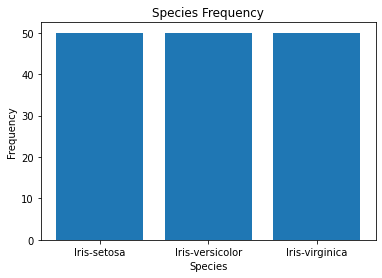

In [9]:
#Comaparaing outcome of diabetic patients using boxplot
import numpy as np
import matplotlib.pyplot as plt

classes = data['Species'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Species Frequency')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

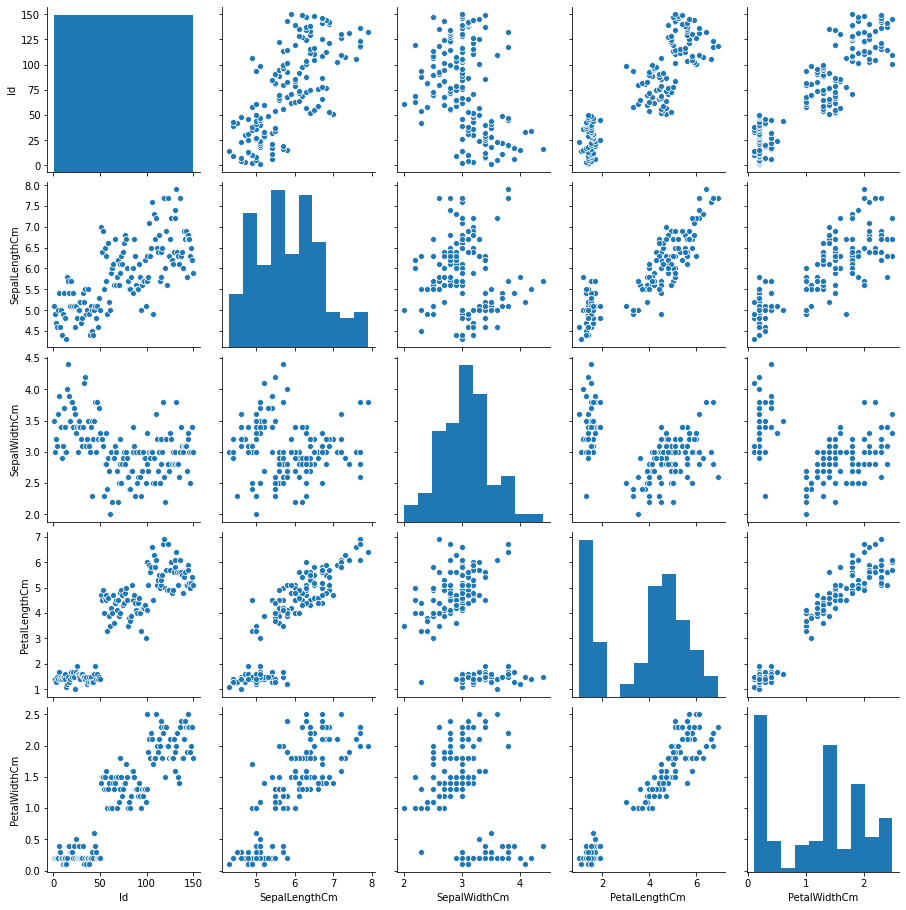

In [99]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98fdc9ca90>,
      dtype=object)

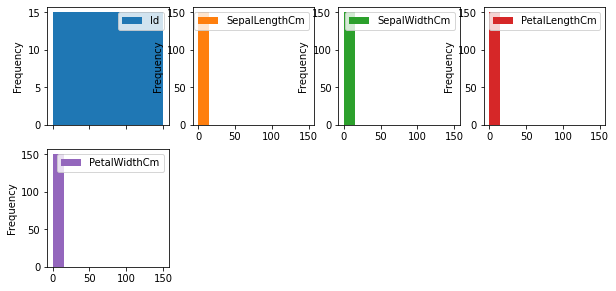

In [11]:
data.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=10)


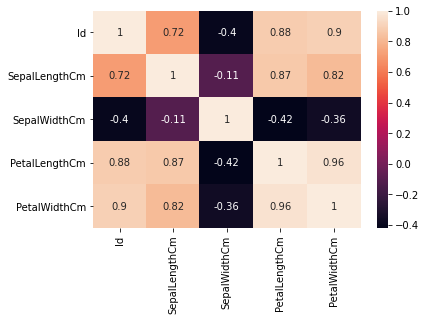

In [12]:
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


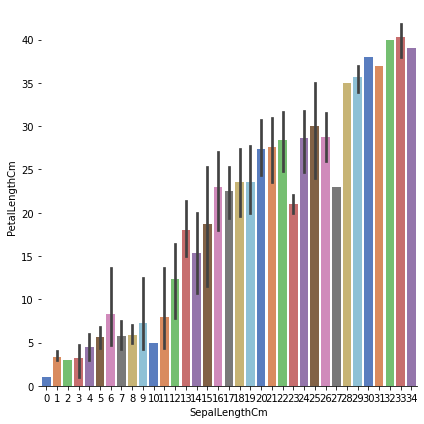

In [67]:
g = sns.factorplot(x="SepalLengthCm",y="PetalLengthCm",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels()

In [13]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Formatting dataset with encoders 

In [30]:

#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
data[["Id"]] = data[["Id"]].apply(LabelEncoder().fit_transform)
data[["SepalLengthCm"]] = data[["SepalLengthCm"]].apply(LabelEncoder().fit_transform)
data[["SepalWidthCm"]] = data[["SepalWidthCm"]].apply(LabelEncoder().fit_transform)
data[["PetalLengthCm"]] = data[["PetalLengthCm"]].apply(LabelEncoder().fit_transform)
data[["PetalWidthCm"]] = data[["PetalWidthCm"]].apply(LabelEncoder().fit_transform)
data["Species"] = data["Species"].map({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3})
data["Species"] = data["Species"].astype(int)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,8,14,4,1,1
1,1,6,9,4,1,1
2,2,4,11,3,1,1
3,3,3,10,5,1,1
4,4,7,15,4,1,1


In [32]:
train = data.head(75)
df = pd.read_csv("test.csv")

In [33]:
#Converting charater column to integer
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df[["Id"]] = df[["Id"]].apply(LabelEncoder().fit_transform)
df[["SepalLengthCm"]] = df[["SepalLengthCm"]].apply(LabelEncoder().fit_transform)
df[["SepalWidthCm"]] = df[["SepalWidthCm"]].apply(LabelEncoder().fit_transform)
df[["PetalLengthCm"]] = df[["PetalLengthCm"]].apply(LabelEncoder().fit_transform)
df[["PetalWidthCm"]] = df[["PetalWidthCm"]].apply(LabelEncoder().fit_transform)
df["Species"] = df["Species"].map({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3})
df["Species"] = df["Species"].astype(int)

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,15,8,10,4,2
1,1,17,6,14,4,2
2,2,16,8,16,7,2
3,3,9,7,11,5,2
4,4,6,4,2,0,2


In [34]:
test = df.head(75)

##N-fold Cross-validation

In [57]:

#Cross-validation 
X=data.iloc[:,1:len(df.columns)-2]
y=data.iloc[:,len(df.columns)-2:len(df.columns)-1]

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

print("--5-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(criterion="gini", random_state=10, max_depth=2, min_samples_leaf=4)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
old_dt_scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=5)

y_prdct=dt_clf.predict(X_test)
#Result
print("All DT scores: ")
print(old_dt_scores)
print("Accuracy mean is:", old_dt_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))




--5-fold cross-validation 
All DT scores: 
{'fit_time': array([0.00242686, 0.001899  , 0.00304723, 0.00301313, 0.00357866]), 'score_time': array([0.00090981, 0.00085044, 0.00119376, 0.00115275, 0.0032897 ]), 'test_score': array([0.16666667, 0.33333333, 0.33333333, 0.66666667, 0.5       ])}
Accuracy mean is: 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.57      0.53         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           9       0.09      1.00      0.17         1
          10       0.00      0.00      0.00         3
          14       0.30      1.00      0.46         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          19       0.00      0.00     

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


#Defining Random Forest Classifier
rf_clf = RandomForestClassifier(criterion="gini", random_state=10, max_depth=4, min_samples_leaf=4)

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
old_rf_scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=5)

y_prdct=rf_clf.predict(X_test)
#Result
print("All RF scores: ")
print(old_rf_scores)

print("Accuracy mean is:", old_rf_scores['test_score'].mean())

print(classification_report(y_test, y_prdct))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


All RF scores: 
{'fit_time': array([0.13203526, 0.1157608 , 0.11700296, 0.11550784, 0.11643577]), 'score_time': array([0.00898838, 0.00938249, 0.00779605, 0.00785804, 0.00848842]), 'test_score': array([0.33333333, 0.33333333, 0.33333333, 0.66666667, 0.5       ])}
Accuracy mean is: 0.4333333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      0.86      0.71         7
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         0
          14       0.25      0.33      0.29         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


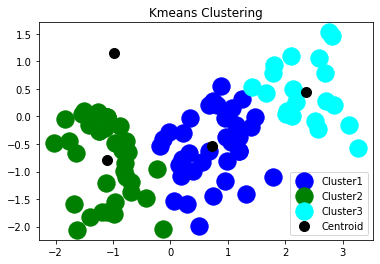

In [59]:


# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters =4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train_pca)
cluster_data=data

cols=list(cluster_data.columns)



# Plotting the results
plt.scatter(X_train_pca[y_kmeans == 0, 0], X_train_pca[y_kmeans == 0, 1], s = 300, c = 'blue', label = 'Cluster1')
plt.scatter(X_train_pca[y_kmeans == 1, 0], X_train_pca[y_kmeans == 1, 1], s = 300, c = 'green', label = 'Cluster2')
plt.scatter(X_train_pca[y_kmeans == 2, 0], X_train_pca[y_kmeans == 2, 1], s = 300, c = 'cyan', label = 'Cluster3')



plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'Black', label = 'Centroid')
plt.title('Kmeans Clustering')
plt.legend(loc="lower right")
plt.show()

In [60]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score






In [41]:
train.head()
train.count()

Id               75
SepalLengthCm    75
SepalWidthCm     75
PetalLengthCm    75
PetalWidthCm     75
Species          75
dtype: int64

In [42]:
test.head()
test.count()

Id               75
SepalLengthCm    75
SepalWidthCm     75
PetalLengthCm    75
PetalWidthCm     75
Species          75
dtype: int64

# **Rank Batched Algorithm**

In [50]:
!pip install modAL

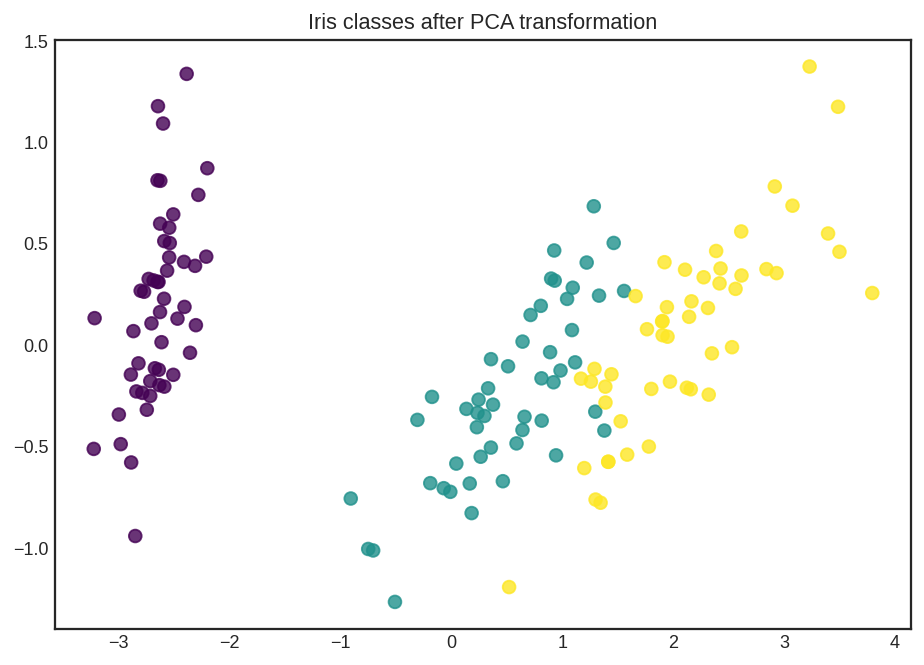

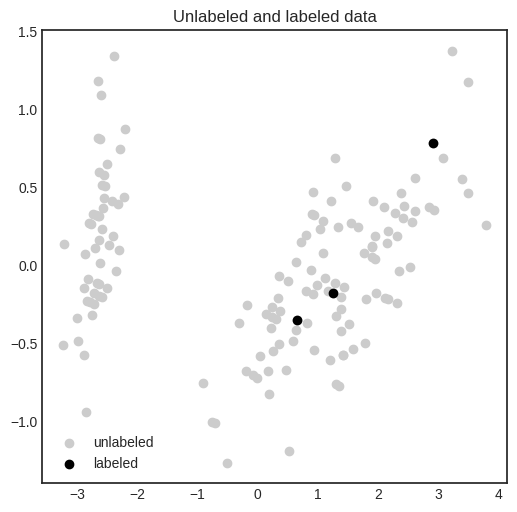

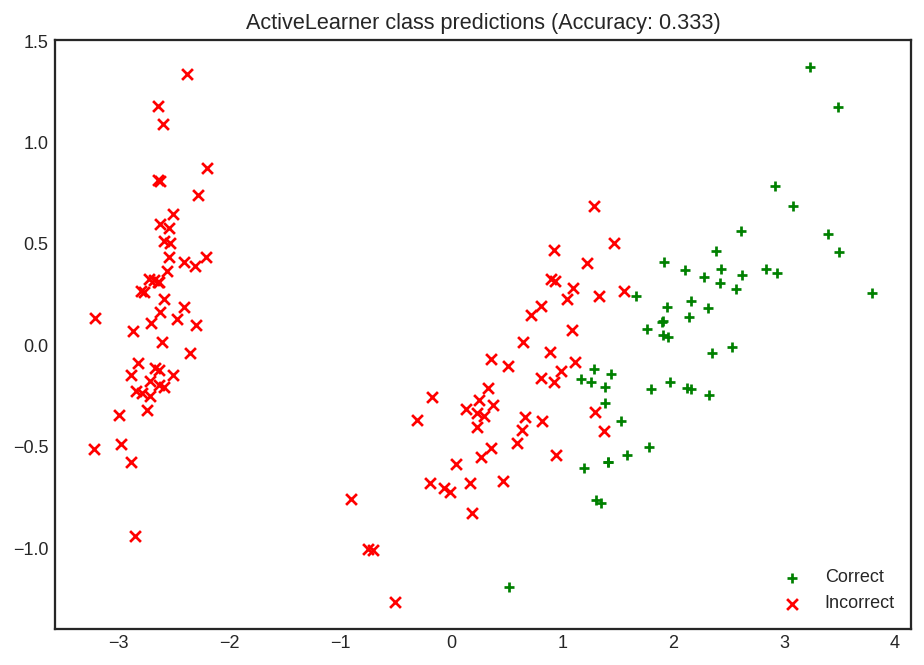

Accuracy after query 1: 0.8933


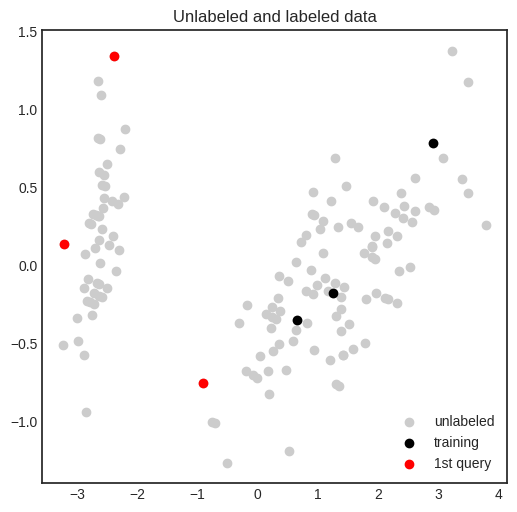

Accuracy after query 2: 0.8400
Accuracy after query 3: 0.9267
Accuracy after query 4: 0.9333
Accuracy after query 5: 0.9467
Accuracy after query 6: 0.9533


In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from functools import partial

from modAL.batch import uncertainty_batch_sampling
from modAL.models import ActiveLearner

# Set our RNG for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

iris = load_iris()
X_raw = iris['data']
y_raw = iris['target']

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_iris = pca.fit_transform(X=X_raw)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_iris[:, 0], transformed_iris[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(8.5, 6), dpi=130)
    plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
    plt.title('Iris classes after PCA transformation')
    plt.show()

# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Visualize the training data.
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6, 6), dpi=100)
    plt.scatter(transformed_iris[:, 0], transformed_iris[:, 1], c='0.8', label='unlabeled')
    plt.scatter(transformed_iris[training_indices, 0], transformed_iris[training_indices, 1], c='k', label='labeled')
    plt.title('Unlabeled and labeled data')
    plt.legend()
    plt.show()

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

# Specify our core estimator.
knn = KNeighborsClassifier(n_neighbors=3)

# Pre-set our batch sampling to retrieve 3 samples at a time.
BATCH_SIZE = 3
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

# Specify our active learning model.
learner = ActiveLearner(
    estimator=knn,
    X_training=X_train,
    y_training=y_train,
    query_strategy=preset_batch
)

# Isolate the data we'll need for plotting.
predictions = learner.predict(X_raw)
is_correct = (predictions == y_raw)

# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

# Plot our classification results.
with plt.style.context('seaborn-white'):
    fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
    ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct')
    ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect')
    ax.legend(loc='lower right')
    ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
    plt.show()

# Pool-based sampling
N_RAW_SAMPLES = 20
N_QUERIES = N_RAW_SAMPLES // BATCH_SIZE

performance_history = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index], y_pool[query_index]
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool = np.delete(X_pool, query_index, axis=0)
    y_pool = np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

    # Visualize the instances selected for query.
    if index == 0:
        selected = pca.transform(query_instance)

        with plt.style.context('seaborn-white'):
            plt.figure(figsize=(6, 6), dpi=100)
            plt.scatter(transformed_iris[:, 0], transformed_iris[:, 1], c='0.8', label='unlabeled')
            plt.scatter(transformed_iris[training_indices, 0], transformed_iris[training_indices, 1], c='k',
                        label='training')
            plt.scatter(selected[:, 0], selected[:, 1], c='r', label='1st query')
            plt.title('Unlabeled and labeled data')
            plt.legend()
            plt.show()



In [61]:
## taking sample from training and test data
training = training.sample(75, random_state=12)
testing = test.sample(75, random_state=11)


### **Pool Based Sampling Algorithm**



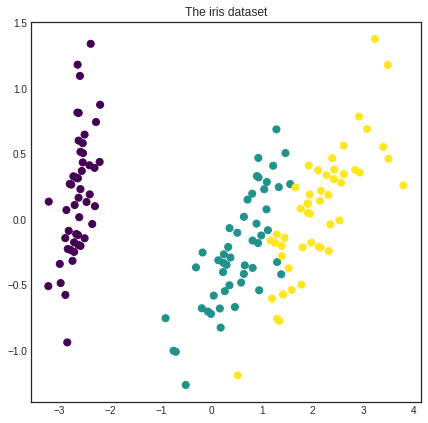

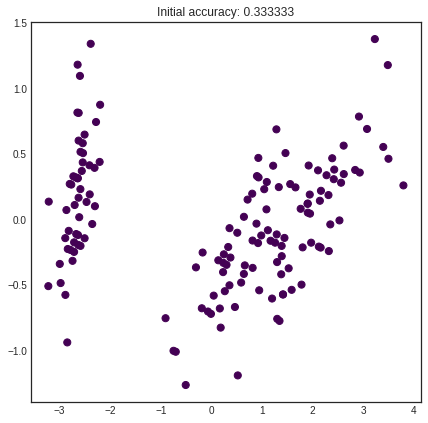

Accuracy before active learning: 0.333333
Accuracy after query no. 1: 0.333333
Accuracy after query no. 2: 0.646667
Accuracy after query no. 3: 0.640000
Accuracy after query no. 4: 0.640000
Accuracy after query no. 5: 0.660000
Accuracy after query no. 6: 0.666667
Accuracy after query no. 7: 0.666667
Accuracy after query no. 8: 0.780000
Accuracy after query no. 9: 0.780000
Accuracy after query no. 10: 0.780000
Accuracy after query no. 11: 0.780000
Accuracy after query no. 12: 0.780000
Accuracy after query no. 13: 0.760000
Accuracy after query no. 14: 0.746667
Accuracy after query no. 15: 0.733333
Accuracy after query no. 16: 0.840000
Accuracy after query no. 17: 0.880000
Accuracy after query no. 18: 0.880000
Accuracy after query no. 19: 0.880000
Accuracy after query no. 20: 0.880000


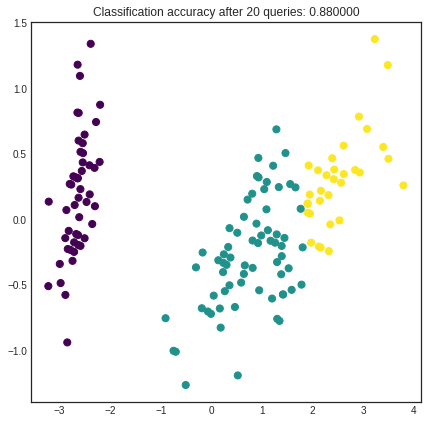

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# loading the iris dataset
iris = load_iris()
# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(iris['data'])
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=iris['target'], cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

# initial training data
train_idx = [0, 50, 100]
X_train = iris['data'][train_idx]
y_train = iris['target'][train_idx]

# generating the pool
X_pool = np.delete(iris['data'], train_idx, axis=0)
y_pool = np.delete(iris['target'], train_idx)

# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(iris['data'], iris['target']))
    plt.show()

print('Accuracy before active learning: %f' % learner.score(iris['data'], iris['target']))

# pool-based sampling
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(iris['data'], iris['target'])))

# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(iris['data'], iris['target'])))
    plt.show()


In [62]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)

In [65]:
## creating a new feature origin
train['origin'] = 1
test['origin'] = 2
training = train.drop('Species',axis=1) #droping target variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
## modelling
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combi.columns:
  score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')
  #The value of AUC-ROC for a particular feature is greater than 0.80, we classify that feature as drifting.
  if (np.mean(score) > 0.8):
    drop_list.append(i)
  print(i,np.mean(score))

Id 0.3488620199146515
SepalLengthCm 0.5197368421052632
SepalWidthCm 0.8031650071123755
PetalLengthCm 0.7387980085348507
PetalWidthCm 0.7139046941678522
Species nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
